<a href="https://colab.research.google.com/github/PratikhyaManas/COVID19_LSTMs/blob/master/COVID19_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#import libs
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import plotly as py
import plotly.express as px

pd.set_option('display.max_rows', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
col_df = pd.read_csv('/content/drive/My Drive/ML_Datasets/covid_19_data.csv')
df = col_df.copy()
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.shape

(19607, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              19607 non-null  int64  
 1   ObservationDate  19607 non-null  object 
 2   Province/State   9606 non-null   object 
 3   Country/Region   19607 non-null  object 
 4   Last Update      19607 non-null  object 
 5   Confirmed        19607 non-null  float64
 6   Deaths           19607 non-null  float64
 7   Recovered        19607 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     10001
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [7]:
nan_states_df = df[df['Province/State'].isnull()]

print('nan_states_df shape is : '+ str(nan_states_df.shape))
print('nan_states_df has got : '+ str(nan_states_df['Country/Region'].nunique()) + ' unique Country/Region values')

nan_states_df = nan_states_df[['ObservationDate','Country/Region','Confirmed','Deaths','Recovered']]
nan_states_df.head()

nan_states_df shape is : (10001, 8)
nan_states_df has got : 214 unique Country/Region values


,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
35,01/22/2020,Japan,2.0,0.0,0.0
36,01/22/2020,Thailand,2.0,0.0,0.0
37,01/22/2020,South Korea,1.0,0.0,0.0
73,01/23/2020,Japan,1.0,0.0,0.0
74,01/23/2020,Thailand,3.0,0.0,0.0


In [8]:
states_df = df[df['Province/State'].notnull()]

print('states_df shape is : '+ str(states_df.shape))
print('states_df has got : '+ str(states_df['Province/State'].nunique()) + ' unique Province/State values')
 
states_df = states_df[['ObservationDate','Province/State','Country/Region','Confirmed','Deaths','Recovered']]
states_df.head()

states_df shape is : (9606, 8)
states_df has got : 297 unique Province/State values


,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [9]:
concentrated_states_df= states_df.groupby(['ObservationDate','Country/Region'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
concentrated_states_df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Macau,1.0,0.0,0.0
2,01/22/2020,Mainland China,547.0,17.0,28.0
3,01/22/2020,Taiwan,1.0,0.0,0.0
4,01/22/2020,US,1.0,0.0,0.0


In [10]:
full_countries_df = pd.concat([nan_states_df, concentrated_states_df], axis=0).reset_index()
full_countries_df.head()

,index,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,35,01/22/2020,Japan,2.0,0.0,0.0
1,36,01/22/2020,Thailand,2.0,0.0,0.0
2,37,01/22/2020,South Korea,1.0,0.0,0.0
3,73,01/23/2020,Japan,1.0,0.0,0.0
4,74,01/23/2020,Thailand,3.0,0.0,0.0


In [11]:
lastest_full_countries_df = full_countries_df.groupby(['Country/Region'])[['ObservationDate','Confirmed','Deaths','Recovered']].max().reset_index()
lastest_full_countries_df.head()

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,02/28/2020,1.0,0.0,0.0
1,"('St. Martin',)",03/10/2020,2.0,0.0,0.0
2,Afghanistan,04/28/2020,1828.0,58.0,228.0
3,Albania,04/28/2020,750.0,30.0,431.0
4,Algeria,04/28/2020,3649.0,437.0,1651.0


In [14]:
US_df = states_df[states_df['Country/Region']=='US'] 
US_df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
31,01/22/2020,Washington,US,1.0,0.0,0.0
69,01/23/2020,Washington,US,1.0,0.0,0.0
117,01/24/2020,Washington,US,1.0,0.0,0.0
118,01/24/2020,Chicago,US,1.0,0.0,0.0
158,01/25/2020,Washington,US,1.0,0.0,0.0


In [15]:
lastest_US_df = US_df.groupby(['Province/State']).max().reset_index()
lastest_US_df.head()

,Province/State,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,"Norfolk County, MA",03/07/2020,US,2.0,0.0,0.0
1,Alabama,04/28/2020,US,6750.0,242.0,0.0
2,"Alameda County, CA",03/09/2020,US,2.0,0.0,0.0
3,Alaska,04/28/2020,US,351.0,9.0,0.0
4,American Samoa,03/30/2020,US,0.0,0.0,0.0


In [16]:
print('Total countries affected by covid virus: ' + str(lastest_full_countries_df['Country/Region'].nunique()) + '\n' + 'That countries are : ' +'\n'+str(lastest_full_countries_df['Country/Region'].unique()) )

Total countries affected by covid virus: 220
That countries are : 
[' Azerbaijan' "('St. Martin',)" 'Afghanistan' 'Albania' 'Algeria'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czech Republic' 'Denmark' 'Diamond Princess'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Gabon' 'Gambia' 'Gambia, The' 'Georgia' 'Ger

In [17]:
print('Worldwide Confirmed Cases: ',lastest_full_countries_df['Confirmed'].sum())
print('Worldwide Deaths: ',lastest_full_countries_df['Deaths'].sum())
print('Worldwide Recovered Cases: ',lastest_full_countries_df['Recovered'].sum())

Worldwide Confirmed Cases:  3114989.0
Worldwide Deaths:  217047.0
Worldwide Recovered Cases:  928630.0


In [18]:
lastest_full_countries_df.sort_values(by='Confirmed', ascending=False)

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
205,US,04/28/2020,1012582.0,58355.0,115936.0
186,Spain,04/28/2020,232128.0,23822.0,123903.0
100,Italy,04/28/2020,201505.0,27359.0,68941.0
69,France,04/28/2020,167605.0,23660.0,46886.0
204,UK,04/28/2020,161145.0,21678.0,813.0
...,...,...,...,...,...
73,"Gambia, The",03/21/2020,1.0,0.0,0.0
77,Gibraltar,03/10/2020,1.0,0.0,1.0
84,Guernsey,03/21/2020,1.0,0.0,0.0
146,North Ireland,02/28/2020,1.0,0.0,0.0


In [19]:
sorted_lastest_full_countries_df = lastest_full_countries_df.sort_values(by='Confirmed', ascending=False)
sorted_lastest_full_countries_df[:10]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
205,US,04/28/2020,1012582.0,58355.0,115936.0
186,Spain,04/28/2020,232128.0,23822.0,123903.0
100,Italy,04/28/2020,201505.0,27359.0,68941.0
69,France,04/28/2020,167605.0,23660.0,46886.0
204,UK,04/28/2020,161145.0,21678.0,813.0
75,Germany,04/28/2020,159912.0,6314.0,117400.0
203,Turkey,04/28/2020,114653.0,2992.0,38809.0
166,Russia,04/28/2020,93558.0,867.0,8456.0
96,Iran,04/28/2020,92584.0,5877.0,72439.0
122,Mainland China,04/28/2020,82858.0,4633.0,77900.0


In [20]:
other_countries_df = full_countries_df[~(full_countries_df['Country/Region']=='Mainland China')]
other_countries_df.head()

lastest_other_countries_df = other_countries_df.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].max().reset_index()


sorted_lastest_other_countries_df = lastest_other_countries_df.sort_values(by='Confirmed', ascending=False)

lastest_other_countries_df.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,1828.0,58.0,228.0
3,Albania,750.0,30.0,431.0
4,Algeria,3649.0,437.0,1651.0


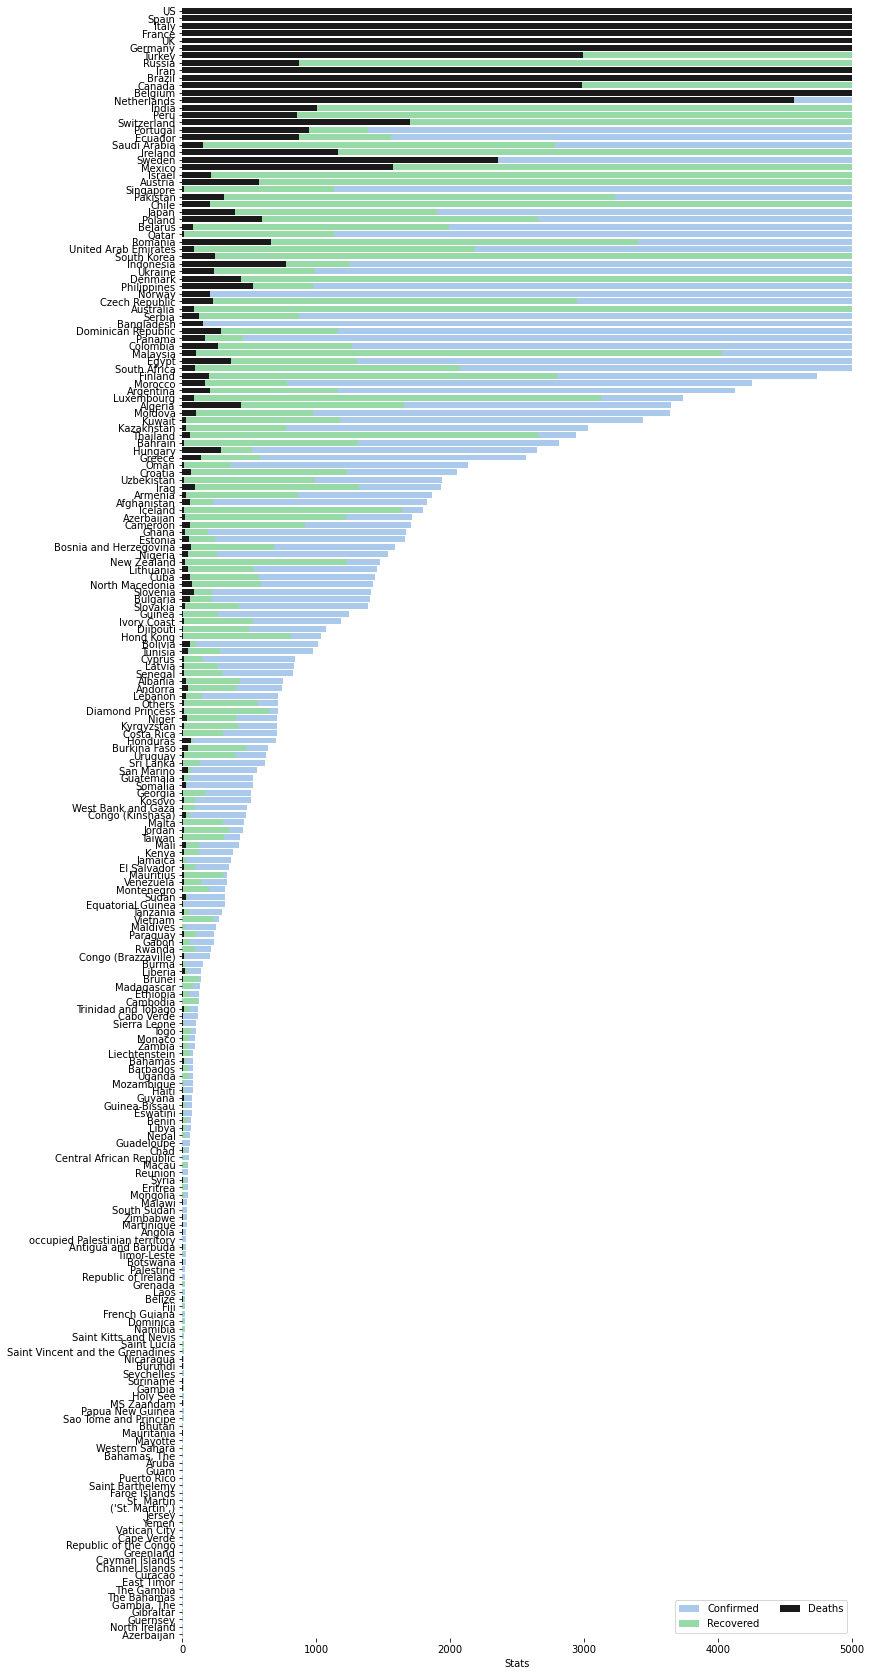

In [21]:
f, ax = plt.subplots(figsize=(12, 30))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Confirmed", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Recovered", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Recovered", color="g")

sns.set_color_codes("pastel")
sns.barplot(x="Deaths", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Deaths", color="k")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [22]:
fig = px.pie(sorted_lastest_other_countries_df, values = 'Confirmed',names='Country/Region', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

In [23]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Confirmed'] == sorted_lastest_full_countries_df['Recovered'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
170,Saint Lucia,04/28/2020,15.0,0.0,15.0
216,Yemen,04/28/2020,1.0,0.0,1.0
77,Gibraltar,03/10/2020,1.0,0.0,1.0


In [24]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Confirmed'] == sorted_lastest_full_countries_df['Deaths'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered


In [25]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Recovered'] < sorted_lastest_full_countries_df['Deaths'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
204,UK,04/28/2020,161145.0,21678.0,813.0
141,Netherlands,04/28/2020,38416.0,4566.0,250.0
191,Sweden,04/28/2020,19621.0,2355.0,1005.0
148,Norway,04/28/2020,7660.0,206.0,32.0
17,Bangladesh,04/28/2020,6462.0,155.0,139.0
182,Somalia,04/28/2020,528.0,28.0,19.0
128,Martinique,03/21/2020,32.0,1.0,0.0
26,Botswana,04/28/2020,23.0,1.0,0.0
119,MS Zaandam,04/28/2020,9.0,2.0,0.0


In [0]:
lastest_full_countries_df['Treatment'] = (lastest_full_countries_df['Confirmed']-(lastest_full_countries_df['Recovered']+lastest_full_countries_df['Deaths']))

US = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='US'][['Treatment','Recovered','Deaths']].iloc[0]
Spain = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Spain'][['Treatment','Recovered','Deaths']].iloc[0]
France = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='France'][['Treatment','Recovered','Deaths']].iloc[0]
Italy = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Italy'][['Treatment','Recovered','Deaths']].iloc[0]
Germany = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='Germany'][['Treatment','Recovered','Deaths']].iloc[0]
India = lastest_full_countries_df[lastest_full_countries_df['Country/Region']=='India'][['Treatment','Recovered','Deaths']].iloc[0]

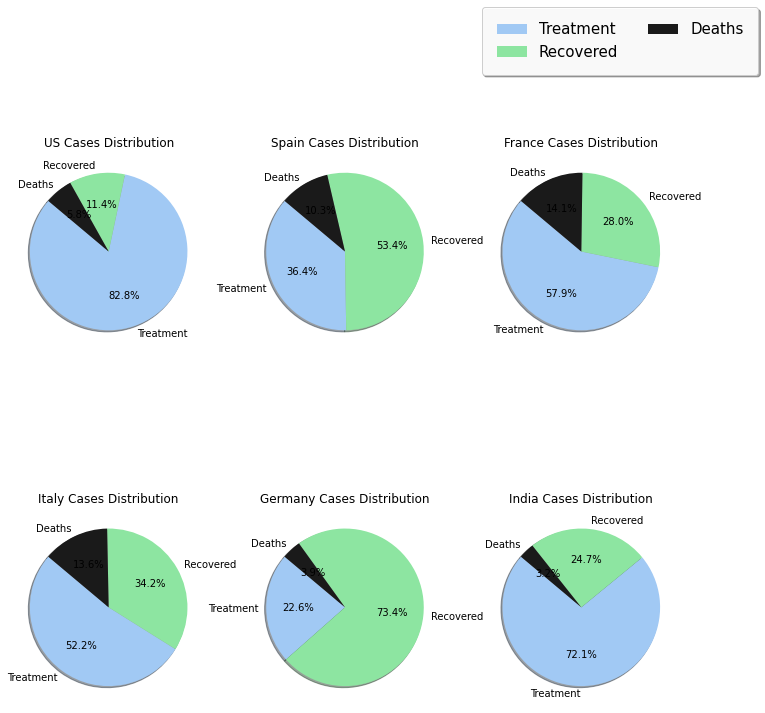

In [32]:
fig, axes = plt.subplots(
                     ncols=3,
                     nrows=2,
                     figsize=(12, 12))

ax1, ax2, ax3, ax4 ,ax5 ,ax6= axes.flatten()

colors = ['b','g','k']
ax1.pie(US
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax1.set_title("US Cases Distribution")

ax2.pie(Spain
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax2.set_title("Spain Cases Distribution")

ax3.pie(France
        , colors=colors
        , autopct='%1.1f%%' # adding percentagens
        , labels=['Treatment','Recovered','Deaths']
        , shadow=True
        , startangle=140)
ax3.set_title("France Cases Distribution")

ax4.pie(Italy
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax4.set_title("Italy Cases Distribution")

ax5.pie(Germany
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax5.set_title("Germany Cases Distribution")

ax6.pie(India
           , colors=colors
           , autopct='%1.1f%%' # adding percentagens
           , labels=['Treatment','Recovered','Deaths']
           , shadow=True
           , startangle=140)
ax6.set_title("India Cases Distribution")

fig.legend(['Treatment','Recovered','Deaths']
           , loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

plt.show();


In [33]:
fig = px.choropleth(full_countries_df, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed",
                    #color_continuous_scale='Rainbow',
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

fig.update_layout(
    title_text = 'Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

In [34]:
temp = full_countries_df.groupby('ObservationDate')['Country/Region'].nunique().reset_index()
temp.columns = ['ObservationDate','CountOfCountry']

fig = px.bar(temp, x='ObservationDate', y='CountOfCountry')
fig.update_layout(
    title_text = 'Number Of Countries With Cases',
    title_x = 0.5)
fig.show()

In [35]:
line_data = full_countries_df.groupby('ObservationDate').sum().reset_index()

line_data = line_data.melt(id_vars='ObservationDate', 
                 value_vars=['Confirmed',
                             'Deaths',
                             'Recovered', 
                             ], 
                 var_name='Ratio', 
                 value_name='Value')

fig = px.line(line_data, x="ObservationDate", y="Value", color='Ratio', 
              title='Confirmed cases, Recovered cases, and Death Over Time')
fig.show()

In [113]:
import pandas as pd
import numpy as np

df_patient = pd.read_csv('/content/drive/My Drive/ML_Datasets/covid_19_data.csv')

daily_count = df_patient.groupby('ObservationDate').Confirmed.count()
daily_count = pd.DataFrame(daily_count)
daily_count

,Confirmed
ObservationDate,
01/22/2020,38
01/23/2020,46
01/24/2020,41
01/25/2020,44
01/26/2020,47
01/27/2020,51
01/28/2020,52
01/29/2020,54
01/30/2020,58


In [114]:
data = daily_count.cumsum()
data

,Confirmed
ObservationDate,
01/22/2020,38
01/23/2020,84
01/24/2020,125
01/25/2020,169
01/26/2020,216
01/27/2020,267
01/28/2020,319
01/29/2020,373
01/30/2020,431


In [115]:
dataset = data.iloc[14:]
dataset
dataset.columns = ['Confirmed']
print("len of the dataset::"+str(len(dataset)))
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-8]#0..30
test_data = dataset[len(dataset)-8:]#30..40

train_data

len of the dataset::84


,Confirmed
ObservationDate,
02/05/2020,836
02/06/2020,907
02/07/2020,979
02/08/2020,1051
02/09/2020,1123
02/10/2020,1195
02/11/2020,1268
02/12/2020,1341
02/13/2020,1415


In [116]:
test_data

,Confirmed
ObservationDate,
04/21/2020,17369
04/22/2020,17688
04/23/2020,18008
04/24/2020,18327
04/25/2020,18646
04/26/2020,18965
04/27/2020,19286
04/28/2020,19607


In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
scaled_train_data

array([[0.        ],
       [0.0043792 ],
       [0.00882008],
       [0.01326096],
       [0.01770184],
       [0.02214272],
       [0.02664528],
       [0.03114784],
       [0.03571208],
       [0.040338  ],
       [0.04496392],
       [0.04958984],
       [0.05421575],
       [0.05884167],
       [0.06352927],
       [0.06821686],
       [0.07339789],
       [0.07857892],
       [0.08382162],
       [0.08937273],
       [0.09517054],
       [0.10140011],
       [0.1078764 ],
       [0.11490779],
       [0.12224758],
       [0.12995744],
       [0.13865417],
       [0.14796768],
       [0.1578363 ],
       [0.16850675],
       [0.18078085],
       [0.19465861],
       [0.21038673],
       [0.22679331],
       [0.23949917],
       [0.25282181],
       [0.26626781],
       [0.28045396],
       [0.295812  ],
       [0.31172516],
       [0.32850182],
       [0.3455252 ],
       [0.363042  ],
       [0.38105224],
       [0.39949423],
       [0.41824462],
       [0.43662493],
       [0.454

In [118]:
scaled_test_data

array([[1.01973725],
       [1.03941282],
       [1.05915006],
       [1.07882563],
       [1.0985012 ],
       [1.11817677],
       [1.1379757 ],
       [1.15777463]])

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input =3
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(19, activation='relu', input_shape = (n_input, n_features)))
lstm_model.add(Dense(10))
lstm_model.add(Dense(5))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 19)                1596      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                200       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [120]:
lstm_model.fit_generator(generator, epochs=28)

Epoch 1/28
73/73 [==============================] - 1s 7ms/step - loss: 0.1284
Epoch 2/28
73/73 [==============================] - 1s 7ms/step - loss: 0.0409
Epoch 3/28
73/73 [==============================] - 1s 7ms/step - loss: 0.0105
Epoch 4/28
73/73 [==============================] - 1s 7ms/step - loss: 2.8031e-04
Epoch 5/28
73/73 [==============================] - 1s 7ms/step - loss: 6.5275e-05
Epoch 6/28
73/73 [==============================] - 1s 7ms/step - loss: 3.6039e-05
Epoch 7/28
73/73 [==============================] - 1s 7ms/step - loss: 2.1676e-05
Epoch 8/28
73/73 [==============================] - 1s 7ms/step - loss: 1.4874e-05
Epoch 9/28
73/73 [==============================] - 0s 7ms/step - loss: 9.9386e-06
Epoch 10/28
73/73 [==============================] - 1s 7ms/step - loss: 6.9486e-06
Epoch 11/28
73/73 [==============================] - 1s 7ms/step - loss: 6.5376e-06
Epoch 12/28
73/73 [==============================] - 1s 7ms/step - loss: 5.0725e-06
Epoch 13/28
7

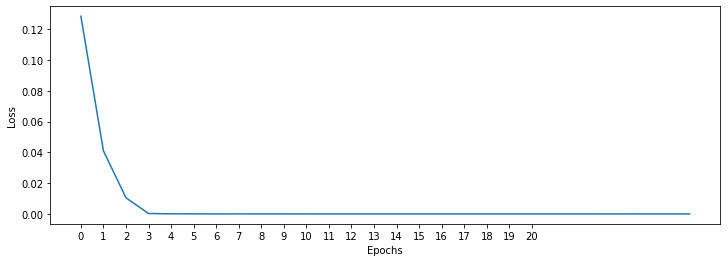

In [122]:
import matplotlib.pyplot as plt
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [123]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)


# As you know we scaled our data that’s why we have to inverse it to see true predictions.
lstm_predictions_scaled

[array([1.0192589], dtype=float32),
 array([1.0393227], dtype=float32),
 array([1.0597734], dtype=float32),
 array([1.0806849], dtype=float32),
 array([1.1021291], dtype=float32),
 array([1.1233758], dtype=float32),
 array([1.145063], dtype=float32),
 array([1.1672175], dtype=float32)]

In [124]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled) 
lstm_predictions

array([[17361.24384487],
       [17686.53948438],
       [18018.10686588],
       [18357.1442883 ],
       [18704.81912673],
       [19049.29141462],
       [19400.90711033],
       [19760.09721494]])

In [125]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Confirmed,LSTM_Predictions
ObservationDate,,
04/21/2020,17369,17361.243845
04/22/2020,17688,17686.539484
04/23/2020,18008,18018.106866
04/24/2020,18327,18357.144288
04/25/2020,18646,18704.819127
04/26/2020,18965,19049.291415
04/27/2020,19286,19400.907110
04/28/2020,19607,19760.097215


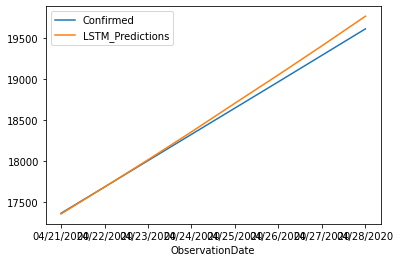

In [126]:
test_data.plot()

In [127]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MAE of LSTM Model ',mean_absolute_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

print('MSE of LSTM Model ',mean_squared_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

MAE of LSTM Model  57.57283644378185
MSE of LSTM Model  6035.031422164046
